In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = sns.load_dataset("diamonds")

### Dataset Check

In [3]:
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
data.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [6]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
data.duplicated().sum()

146

In [8]:
data = data.drop_duplicates()

In [9]:
data.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


depth   -0.011048
table    0.126566
z        0.861208
y        0.865395
x        0.884504
carat    0.921548
price    1.000000
Name: price, dtype: float64


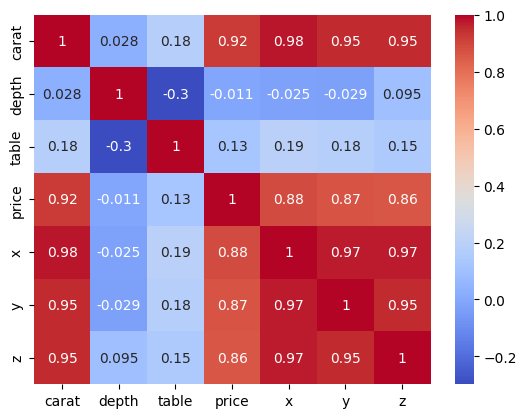

In [10]:
dropFeatures = ["cut","color","clarity"]
dataNumeric = data.drop(dropFeatures, axis=1)
corr = dataNumeric.corr()
sns.heatmap(corr, annot = True, cmap="coolwarm")
print(dataNumeric.corr()["price"].sort_values())

### Data Visualization

#### Histograms

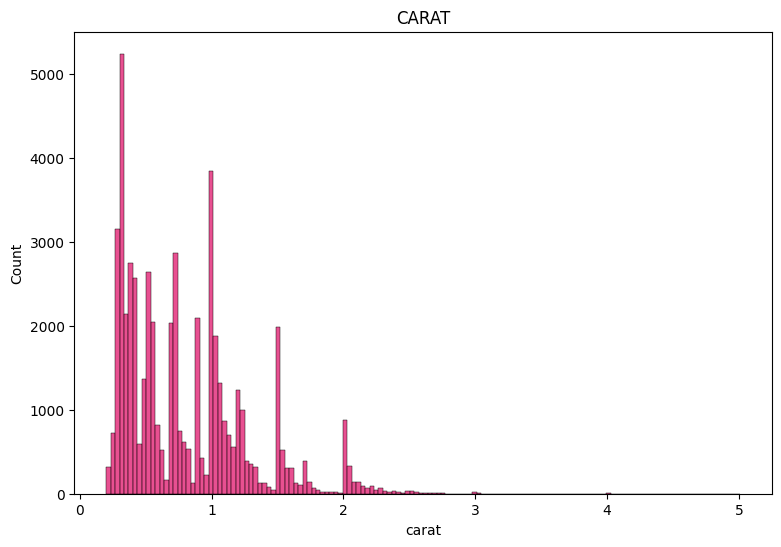

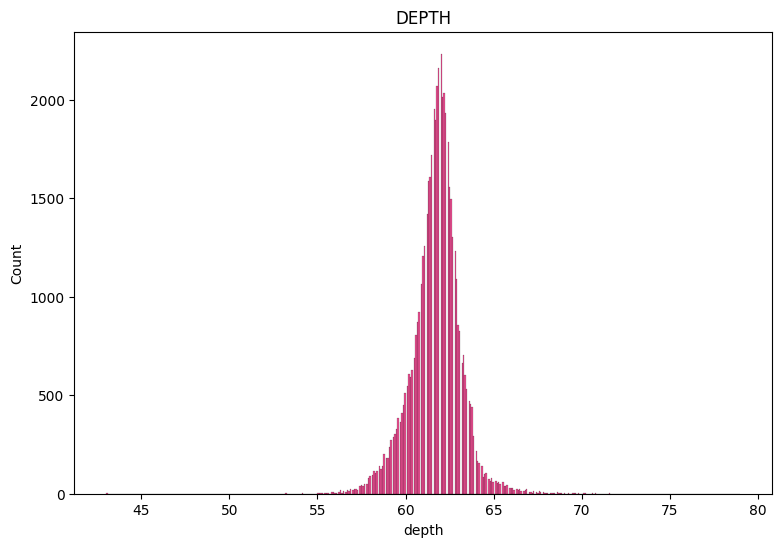

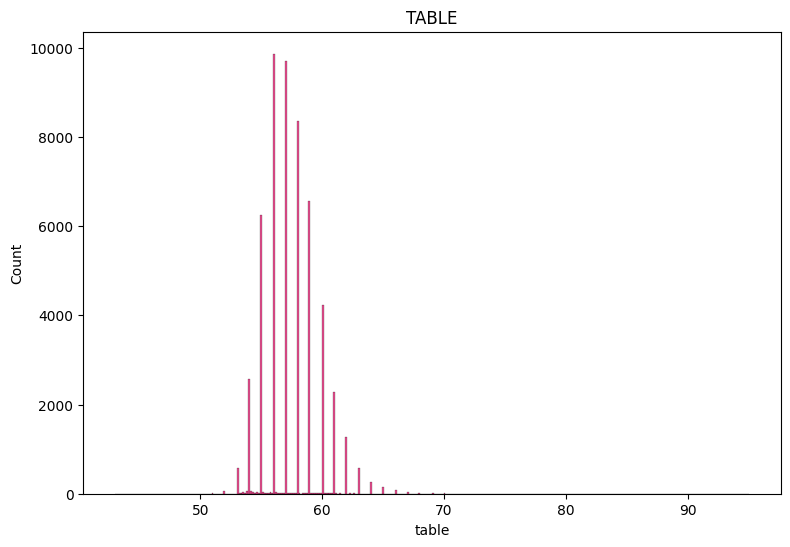

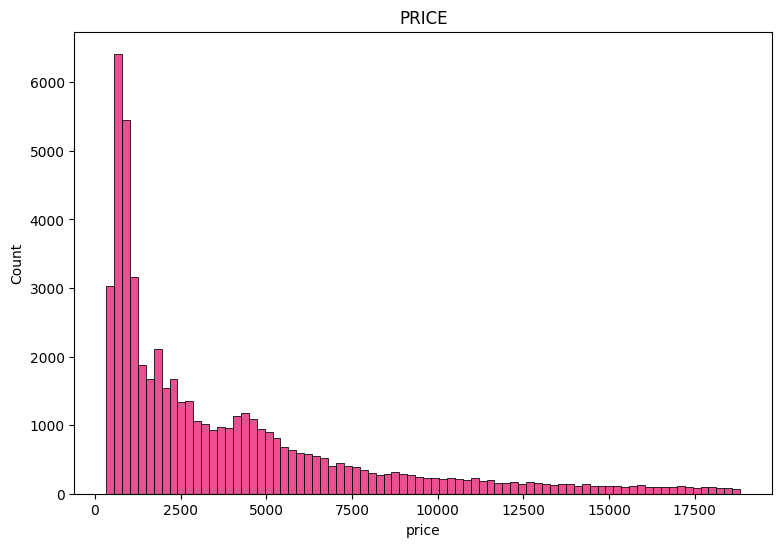

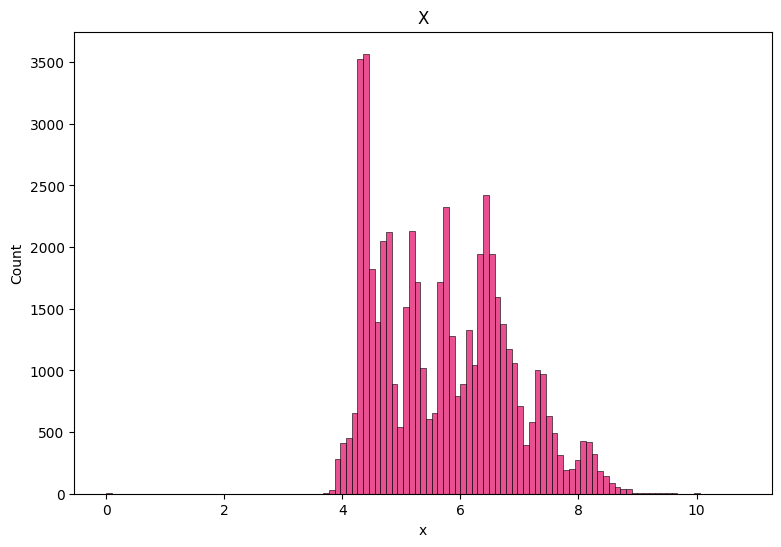

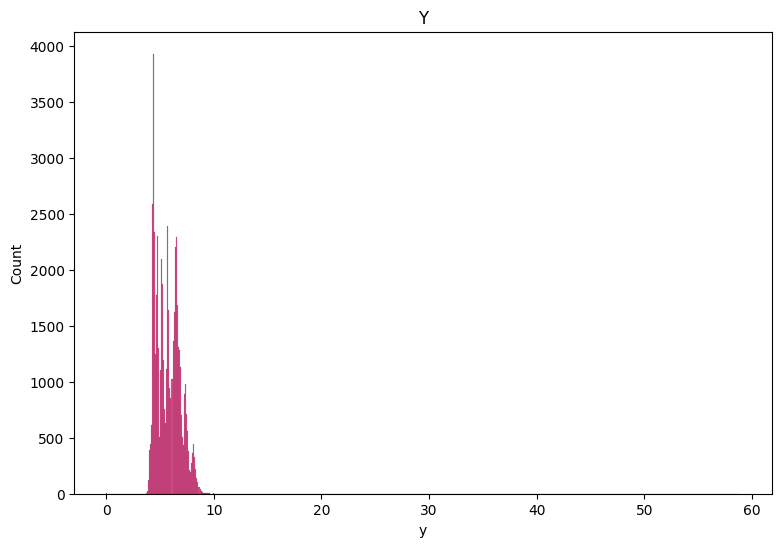

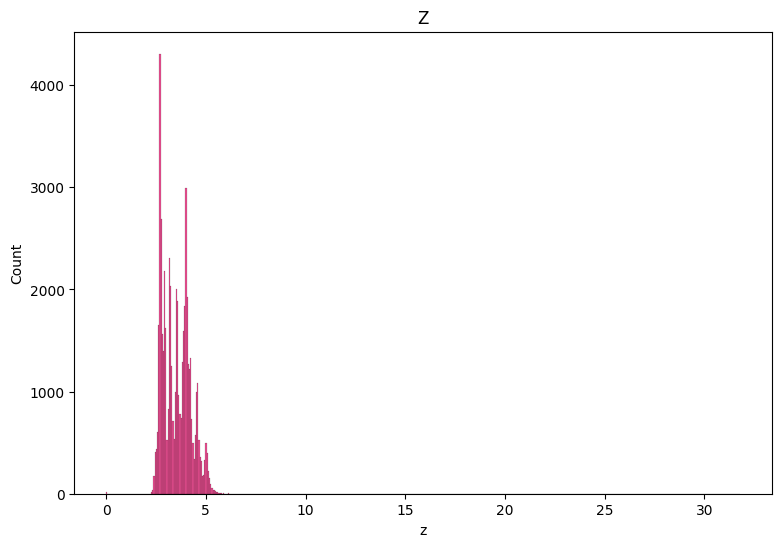

In [11]:
feature = 0
while (feature <= 9):
    if feature == 1 or feature == 2 or feature == 3:
        feature += 1
        continue
    else:
        plt.figure(figsize=(9,6))
        sns.histplot(data=data, x=data.iloc[:,feature], color="#E1156D")
        plt.title(f"{data.columns[feature].upper()}")
        plt.show()
        feature += 1

#### Boxplots

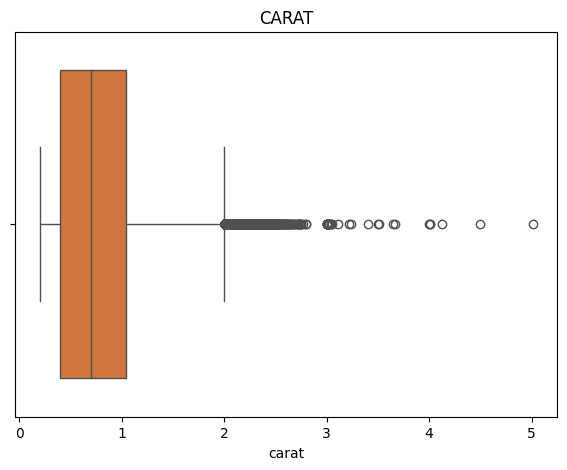

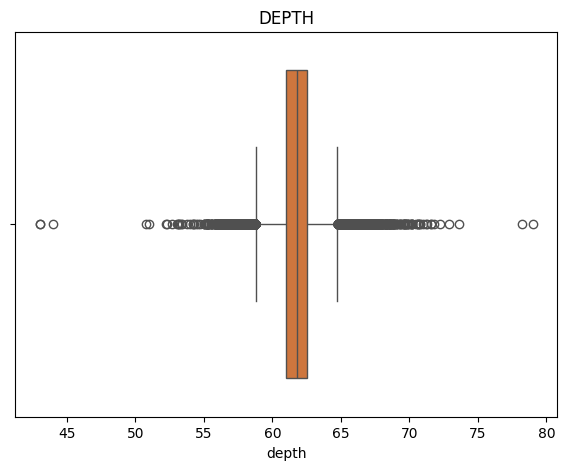

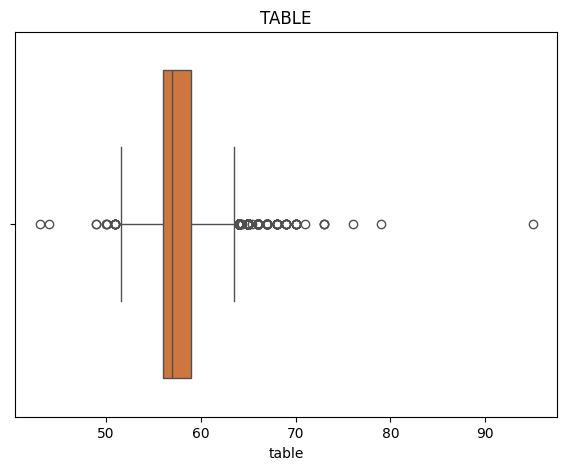

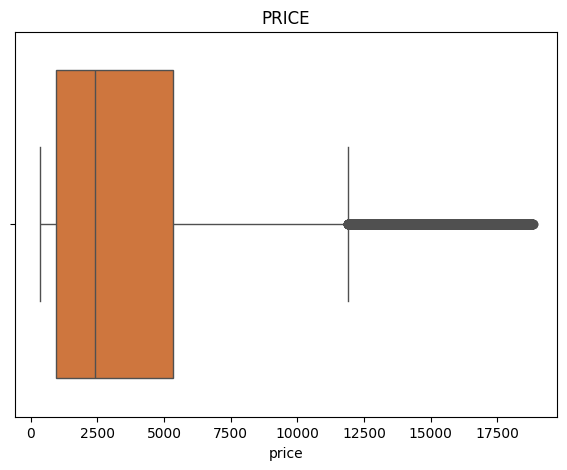

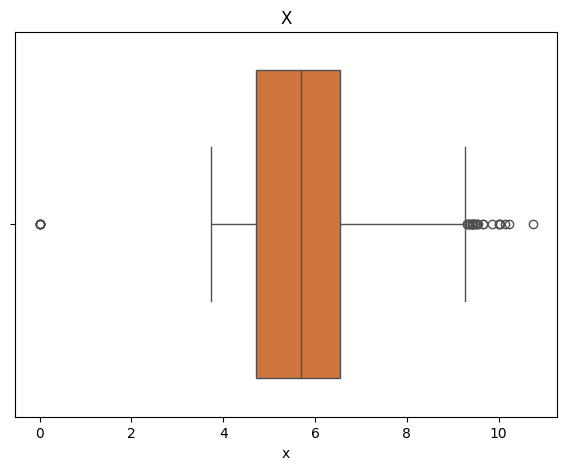

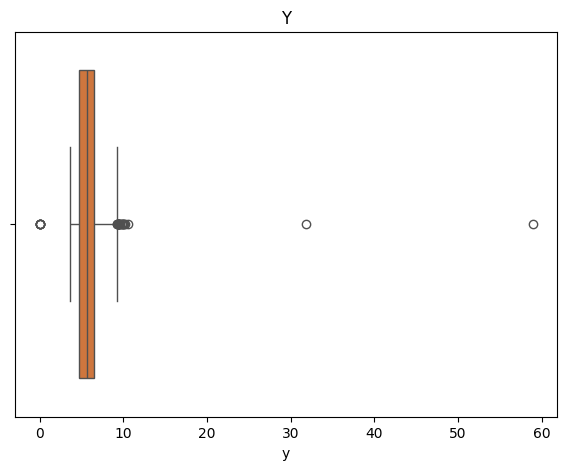

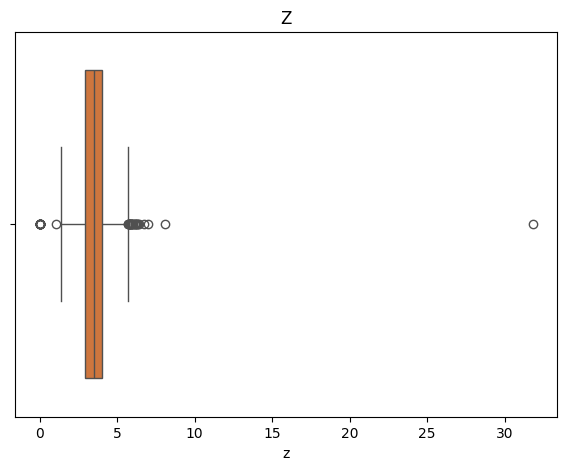

In [12]:
feature = 0
while (feature <= 9):
    if feature == 1 or feature == 2 or feature == 3:
        feature += 1
        continue
    else:
        plt.figure(figsize=(7,5))
        sns.boxplot(data=data, x=data.iloc[:,feature], color="#E67126")
        plt.title(f"{data.columns[feature].upper()}")
        plt.show()
        feature += 1

#### Scatter Plots

<Axes: xlabel='carat', ylabel='price'>

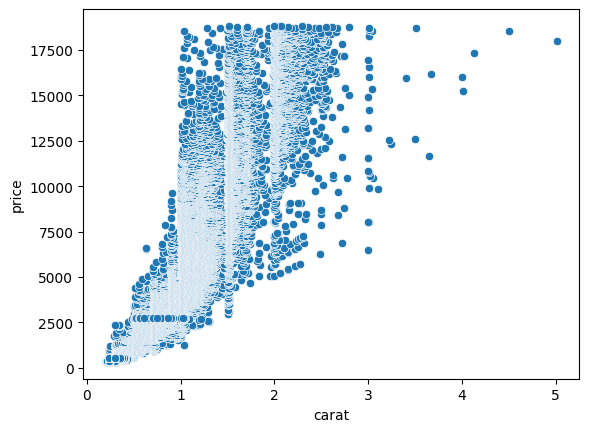

In [13]:
sns.scatterplot(data=data, x="carat", y="price")

<Axes: xlabel='x', ylabel='price'>

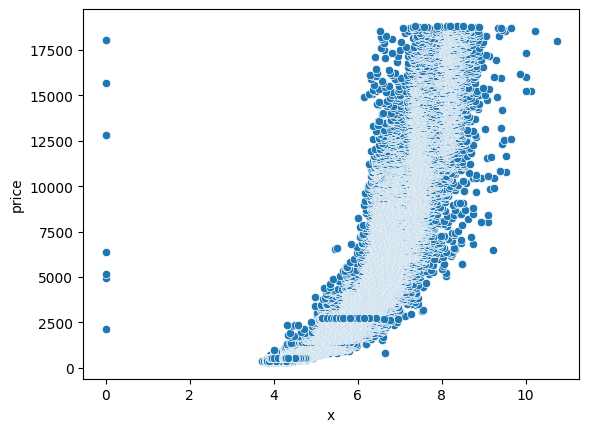

In [14]:
sns.scatterplot(data=data, x="x", y="price")

<Axes: xlabel='y', ylabel='price'>

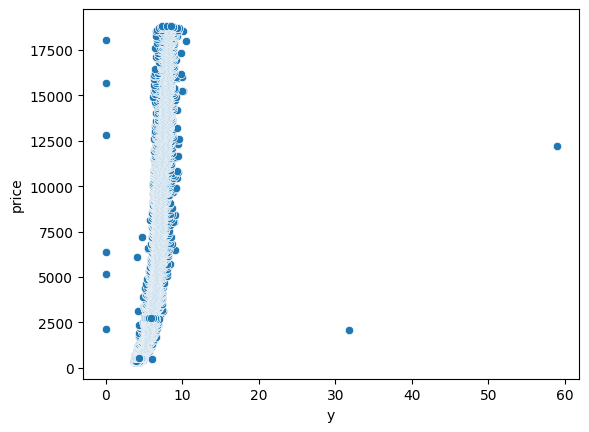

In [15]:
sns.scatterplot(data=data, x="y", y="price")

<Axes: xlabel='z', ylabel='price'>

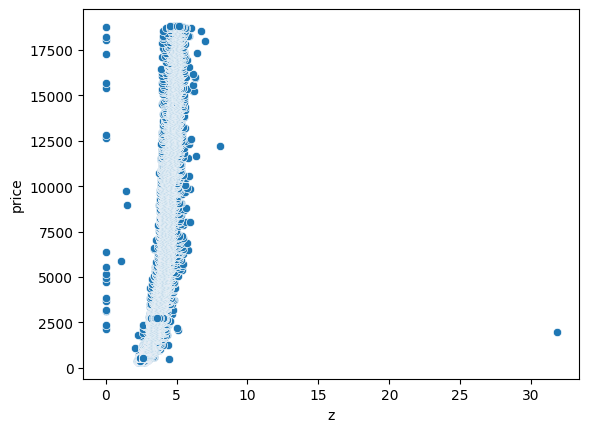

In [16]:
sns.scatterplot(data=data, x="z", y="price")

#### Non-Numeric Features

There are three non-numeric feature in dataset. Non-numeric data will be graphed to understand the data correctly.

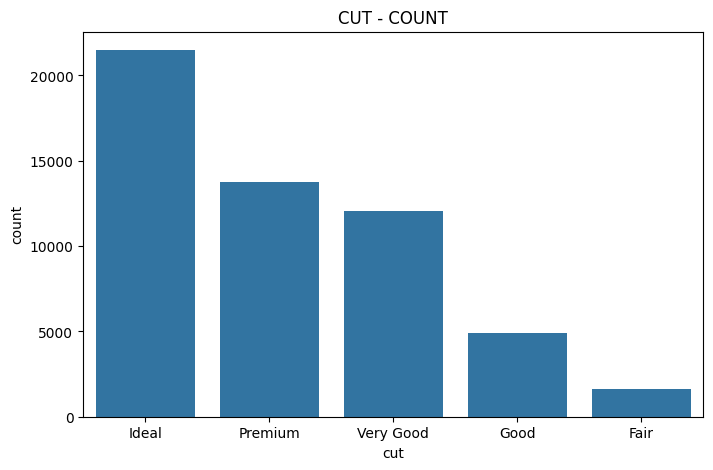

Cut: Ideal, Number of data: 21488
Cut: Premium, Number of data: 13748
Cut: Very Good, Number of data: 12069
Cut: Good, Number of data: 4891
Cut: Fair, Number of data: 1598


In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x="cut", data=data)
plt.title("CUT - COUNT")
plt.show()

counts = data["cut"].value_counts()
for i,j in data["cut"].value_counts().sort_index().items():
    print(f"Cut: {i}, Number of data: {j}")

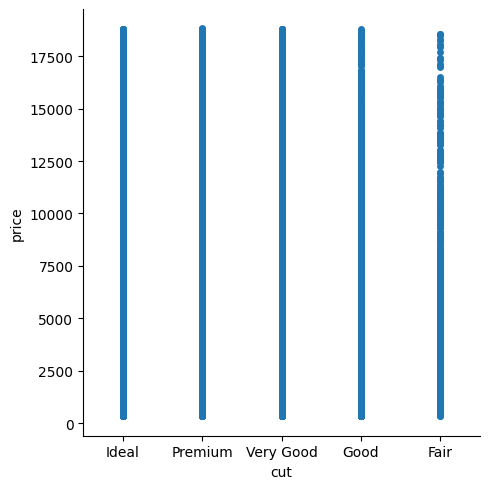

In [18]:
sns.catplot(data=data, x="cut", y="price", jitter=False)

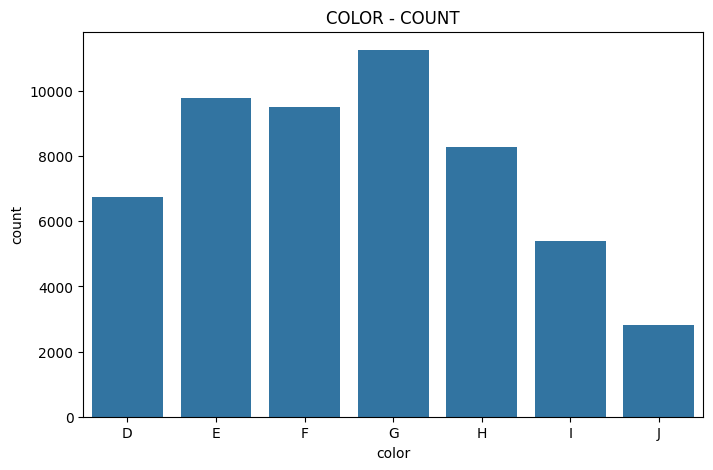

Color: D, Number of data: 6755
Color: E, Number of data: 9776
Color: F, Number of data: 9520
Color: G, Number of data: 11262
Color: H, Number of data: 8272
Color: I, Number of data: 5407
Color: J, Number of data: 2802


In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x="color", data=data)
plt.title("COLOR - COUNT")
plt.show()

counts = data["color"].value_counts()
for i,j in data["color"].value_counts().sort_index().items():
    print(f"Color: {i}, Number of data: {j}")

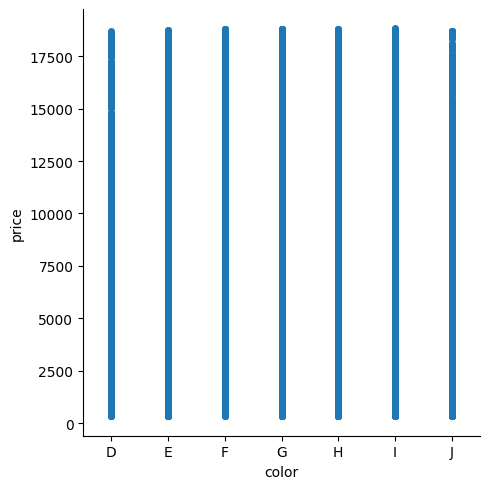

In [20]:
sns.catplot(data=data, x="color", y="price", jitter=False)

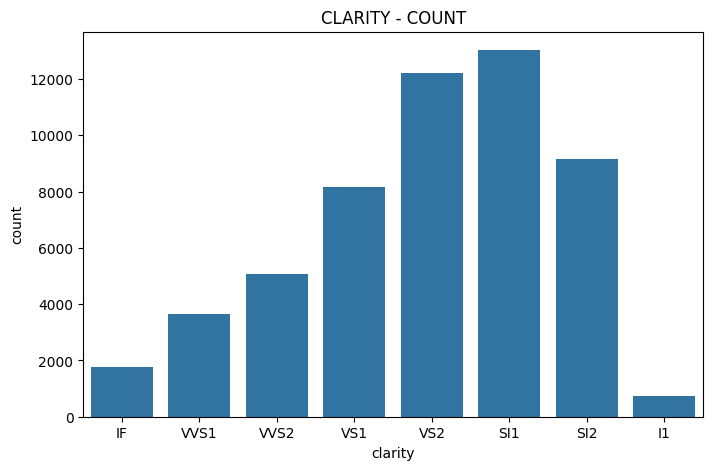

Clarity: IF, Number of data: 1784
Clarity: VVS1, Number of data: 3647
Clarity: VVS2, Number of data: 5056
Clarity: VS1, Number of data: 8156
Clarity: VS2, Number of data: 12229
Clarity: SI1, Number of data: 13032
Clarity: SI2, Number of data: 9150
Clarity: I1, Number of data: 740


In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x="clarity", data=data)
plt.title("CLARITY - COUNT")
plt.show()

counts = data["clarity"].value_counts()
for i,j in data["clarity"].value_counts().sort_index().items():
    print(f"Clarity: {i}, Number of data: {j}")

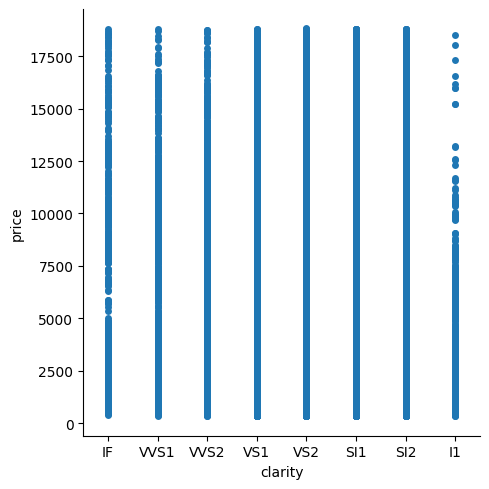

In [22]:
sns.catplot(data=data, x="clarity", y="price", jitter=False)

These features will take numerical values within themselves.

### Data Transformation for Converting Non-Numeric Data

In [23]:
data["cut"].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

1: Fair

2: Good

3: Very Good

4: Premium

5: Ideal

In [24]:
data["color"].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

1: D

2: E

3: F

4: G

5: H

6: I

7: J

In [25]:
data["clarity"].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

1: I1

2: SI2

3: SI1

4: VS2

5: VS1

6: VVS2

7: VVS1

8: IF

In [26]:
cutMapping = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}
colorMapping = {"D":1, "E":2, "F":3, "G":4, "H":5, "I":6, "J":7}
clarityMapping = {"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}

data["cut"] = data["cut"].map(cutMapping)
data["color"] = data["color"].map(colorMapping)
data["clarity"] = data["clarity"].map(clarityMapping)

In [27]:
data.head(10) # dataset check

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,3,7,6,62.8,57.0,336,3.94,3.96,2.48
6,0.24,3,6,7,62.3,57.0,336,3.95,3.98,2.47
7,0.26,3,5,3,61.9,55.0,337,4.07,4.11,2.53
8,0.22,1,2,4,65.1,61.0,337,3.87,3.78,2.49
9,0.23,3,5,5,59.4,61.0,338,4.00,4.05,2.39


### Train-Test Split

In [28]:
x = data.drop("price", axis=1).values
y = data["price"].values
print(x,y)

[[0.23 5.   2.   ... 3.95 3.98 2.43]
 [0.21 4.   2.   ... 3.89 3.84 2.31]
 [0.23 2.   2.   ... 4.05 4.07 2.31]
 ...
 [0.7  3.   1.   ... 5.66 5.68 3.56]
 [0.86 4.   5.   ... 6.15 6.12 3.74]
 [0.75 5.   1.   ... 5.83 5.87 3.64]] [ 326  326  327 ... 2757 2757 2757]


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=0)

In [31]:
print(f"x_train shape: {x_train.shape}\nx_test shape: {x_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

x_train shape: (36041, 9)
x_test shape: (17753, 9)
y_train shape: (36041,)
y_test shape: (17753,)


### Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Model Building

#### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regLR = LinearRegression()

In [37]:
regLR.fit(x_train,y_train)

LinearRegression()

In [38]:
predictionLR = regLR.predict(x_test)

#### Polynomial Regression

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
regPoly = PolynomialFeatures(degree = 2)

In [41]:
xPoly = regPoly.fit_transform(x_train)

In [42]:
regLR.fit(xPoly,y_train)

LinearRegression()

In [43]:
predictionPoly = regLR.predict(regPoly.fit_transform(x_test))

#### Support Vector Regression

In [44]:
from sklearn.svm import SVR

In [45]:
regSVR = SVR(kernel = "linear")

In [46]:
regSVR.fit(x_train,y_train)

SVR(kernel='linear')

In [47]:
predictionSVR = regSVR.predict(x_test)

#### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
regDT = DecisionTreeRegressor(random_state=0)

In [50]:
regDT.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [51]:
predictionDT = regDT.predict(x_test)

#### Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
regRF = RandomForestRegressor(n_estimators=1000, random_state=0)

In [54]:
regRF.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [55]:
predictionRF = regRF.predict(x_test)

### Evaluation

In [56]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [57]:
listForModels = ["Linear Regression", "Polynomial Regression", "Support Vector Regression", "Decision Tree", "Random Forest"]
listForPredictions = [predictionLR, predictionPoly, predictionSVR, predictionDT, predictionRF]

In [58]:
def comparisonModels(listForModels,listForPredictions,y_test):
    
    for modelName, predictions in zip(listForModels, listForPredictions):
        
        mae = round(mean_absolute_error(y_test,predictions), 1)
        r2 = round(r2_score(y_test,predictions), 2)
        mape = round(mean_absolute_percentage_error(y_test,predictions)*100, 1)
        
        
        print(f"Model Name: {modelName}")
        print(f"Mean Absoulute Error: {mae}")
        print(f"R-Score: {r2}")
        print(f"Mean Absoulute Percentage Error: {mape}%")
        print("\n")

comparisonModels(listForModels,listForPredictions,y_test)

Model Name: Linear Regression
Mean Absoulute Error: 809.4
R-Squared Score: 0.91
Mean Absoulute Percentage Error: 43.6%


Model Name: Polynomial Regression
Mean Absoulute Error: 476.9
R-Squared Score: 0.81
Mean Absoulute Percentage Error: 19.8%


Model Name: Support Vector Regression
Mean Absoulute Error: 834.2
R-Squared Score: 0.86
Mean Absoulute Percentage Error: 31.0%


Model Name: Decision Tree
Mean Absoulute Error: 360.7
R-Squared Score: 0.97
Mean Absoulute Percentage Error: 8.6%


Model Name: Random Forest
Mean Absoulute Error: 267.9
R-Squared Score: 0.98
Mean Absoulute Percentage Error: 6.4%




Based on the data, it is observed that the best model is Random Forest. The Random Forest model outperforms the others with the lowest Mean Absolute Error and the highest R-Squared Score.